**Personal Project**

---
*   Agung Besti
*   Alifia Listu Samatha
*   Anindya Widi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
q1_2018 = pd.read_csv('/content/drive/My Drive/bikeshare2018/Bike Share Toronto Ridership_Q1 2018.csv')
q2_2018 = pd.read_csv('/content/drive/My Drive/bikeshare2018/Bike Share Toronto Ridership_Q2 2018.csv')
q3_2018 = pd.read_csv('/content/drive/My Drive/bikeshare2018/Bike Share Toronto Ridership_Q3 2018.csv')
q4_2018 = pd.read_csv('/content/drive/My Drive/bikeshare2018/Bike Share Toronto Ridership_Q4 2018.csv')

In [3]:
toronto = [q1_2018, q2_2018, q3_2018, q4_2018]
data = pd.concat(toronto)

In [4]:
data.head()

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type
0,2383648,393,7018,1/1/2018 0:47,Bremner Blvd / Rees St,1/1/2018 0:54,7176,Bathurst St / Fort York Blvd,Annual Member
1,2383649,625,7184,1/1/2018 0:52,Ossington Ave / College St,1/1/2018 1:03,7191,Central Tech (Harbord St),Annual Member
2,2383650,233,7235,1/1/2018 0:55,Bay St / College St (West Side) - SMART,1/1/2018 0:59,7021,Bay St / Albert St,Annual Member
3,2383651,1138,7202,1/1/2018 0:57,Queen St W / York St (City Hall),1/1/2018 1:16,7020,Phoebe St / Spadina Ave,Annual Member
4,2383652,703,7004,1/1/2018 1:00,University Ave / Elm St,1/1/2018 1:12,7060,Princess St / Adelaide St E,Annual Member


In [5]:
data.shape

(1922955, 9)

In [6]:
data.isnull().values.any()

False

### **1. Are bikeshare users would travel in the reverse direction in the evening than in the morning?**

In [7]:
from datetime import datetime

In [8]:
#convert time to datetime
data['time'] = pd.to_datetime(data.trip_start_time)
data.index = data.time.dt.date
data.index.name = 'index'

In [9]:
data.head()

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type,time
index,,,,,,,,,,
2018-01-01,2383648,393,7018,1/1/2018 0:47,Bremner Blvd / Rees St,1/1/2018 0:54,7176,Bathurst St / Fort York Blvd,Annual Member,2018-01-01 00:47:00
2018-01-01,2383649,625,7184,1/1/2018 0:52,Ossington Ave / College St,1/1/2018 1:03,7191,Central Tech (Harbord St),Annual Member,2018-01-01 00:52:00
2018-01-01,2383650,233,7235,1/1/2018 0:55,Bay St / College St (West Side) - SMART,1/1/2018 0:59,7021,Bay St / Albert St,Annual Member,2018-01-01 00:55:00
2018-01-01,2383651,1138,7202,1/1/2018 0:57,Queen St W / York St (City Hall),1/1/2018 1:16,7020,Phoebe St / Spadina Ave,Annual Member,2018-01-01 00:57:00
2018-01-01,2383652,703,7004,1/1/2018 1:00,University Ave / Elm St,1/1/2018 1:12,7060,Princess St / Adelaide St E,Annual Member,2018-01-01 01:00:00


In [10]:
#Convert time to part of day
data['period'] = (data['time'].dt.hour % 24 + 4) // 4
data['period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

In [11]:
data.head(10)

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type,time,period
index,,,,,,,,,,,
2018-01-01,2383648,393,7018,1/1/2018 0:47,Bremner Blvd / Rees St,1/1/2018 0:54,7176,Bathurst St / Fort York Blvd,Annual Member,2018-01-01 00:47:00,Late Night
2018-01-01,2383649,625,7184,1/1/2018 0:52,Ossington Ave / College St,1/1/2018 1:03,7191,Central Tech (Harbord St),Annual Member,2018-01-01 00:52:00,Late Night
2018-01-01,2383650,233,7235,1/1/2018 0:55,Bay St / College St (West Side) - SMART,1/1/2018 0:59,7021,Bay St / Albert St,Annual Member,2018-01-01 00:55:00,Late Night
2018-01-01,2383651,1138,7202,1/1/2018 0:57,Queen St W / York St (City Hall),1/1/2018 1:16,7020,Phoebe St / Spadina Ave,Annual Member,2018-01-01 00:57:00,Late Night
2018-01-01,2383652,703,7004,1/1/2018 1:00,University Ave / Elm St,1/1/2018 1:12,7060,Princess St / Adelaide St E,Annual Member,2018-01-01 01:00:00,Late Night
2018-01-01,2383653,1026,7078,1/1/2018 1:07,College St / Major St,1/1/2018 1:24,7130,Pears Av / Avenue Rd,Annual Member,2018-01-01 01:07:00,Late Night
2018-01-01,2383654,274,7021,1/1/2018 1:33,Bay St / Albert St,1/1/2018 1:38,7033,Union Station,Annual Member,2018-01-01 01:33:00,Late Night
2018-01-01,2383655,764,7046,1/1/2018 1:34,Niagara St / Richmond St W,1/1/2018 1:47,7275,Queen St W / James St,Annual Member,2018-01-01 01:34:00,Late Night
2018-01-01,2383657,237,7044,1/1/2018 1:37,Church St / Alexander St,1/1/2018 1:41,7028,Gould St / Mutual St,Annual Member,2018-01-01 01:37:00,Late Night


In [12]:
allmorning_bikers = data[data['period'].str.contains('Morning', regex=False)]

In [13]:
morning_bikers = allmorning_bikers[~allmorning_bikers['period'].str.contains('Early', regex=False)]

In [14]:
morning_bikers.head()

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type,time,period
index,,,,,,,,,,,
2018-01-01,2383700,511,7042,1/1/2018 8:20,Sherbourne St / Wellesley St E,1/1/2018 8:28,7009,King St E / Jarvis St,Annual Member,2018-01-01 08:20:00,Morning
2018-01-01,2383701,644,7203,1/1/2018 8:24,Bathurst St/Queens Quay(Billy Bishop Airport),1/1/2018 8:34,7043,Queens Quay W / Lower Simcoe St,Annual Member,2018-01-01 08:24:00,Morning
2018-01-01,2383702,216,7153,1/1/2018 8:26,Bloor St W / Christie St,1/1/2018 8:29,7149,Yarmouth Rd / Christie St,Annual Member,2018-01-01 08:26:00,Morning
2018-01-01,2383703,448,7241,1/1/2018 8:48,519 Church St - SMART,1/1/2018 8:55,7062,University Ave / College St (West),Annual Member,2018-01-01 08:48:00,Morning
2018-01-01,2383704,290,7000,1/1/2018 9:22,Fort York Blvd / Capreol Ct,1/1/2018 9:27,7011,Wellington St W / Portland St,Annual Member,2018-01-01 09:22:00,Morning


In [15]:
morning_bikers.tail()

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type,time,period
index,,,,,,,,,,,
2018-12-31,4580270,251,7336,12/31/2018 11:58,Queen St E / Alton Av,12/31/2018 12:02,7287,Queen St E / Pape Ave - SMART,Annual Member,2018-12-31 11:58:00,Morning
2018-12-31,4580271,323,7324,12/31/2018 11:58,King St W / Charlotte St,12/31/2018 12:03,7049,Queen St W / Portland St,Annual Member,2018-12-31 11:58:00,Morning
2018-12-31,4580272,923,7235,12/31/2018 11:58,Bay St / College St (West Side) - SMART,12/31/2018 12:14,7038,Dundas St W / Yonge St,Annual Member,2018-12-31 11:58:00,Morning
2018-12-31,4580273,328,7040,12/31/2018 11:59,Euclid Ave / Bloor St W,12/31/2018 12:04,7149,Yarmouth Rd / Christie St,Annual Member,2018-12-31 11:59:00,Morning
2018-12-31,4580274,266,7385,12/31/2018 11:59,20 Charles St E,12/31/2018 12:03,7006,Bay St / College St (East Side),Annual Member,2018-12-31 11:59:00,Morning


In [16]:
morning_bikers.shape

(447461, 11)

In [17]:
evening_bikers = data[data['period'].str.contains('Evening', regex=False)]

In [18]:
evening_bikers.head()

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type,time,period
index,,,,,,,,,,,
2018-01-01,2383884,351,7027,1/1/2018 16:05,Beverley St / Dundas St W,1/1/2018 16:10,7049,Queen St W / Portland St,Annual Member,2018-01-01 16:05:00,Evening
2018-01-01,2383885,212,7044,1/1/2018 16:09,Church St / Alexander St,1/1/2018 16:13,7164,Gould St / Yonge St (Ryerson University),Annual Member,2018-01-01 16:09:00,Evening
2018-01-01,2383886,131,7030,1/1/2018 16:13,Bay St / Wellesley St W,1/1/2018 16:15,7235,Bay St / College St (West Side) - SMART,Annual Member,2018-01-01 16:13:00,Evening
2018-01-01,2383887,611,7251,1/1/2018 16:16,The Royal Ontario Museum (Bloor St Entrance),1/1/2018 16:26,7040,Euclid Ave / Bloor St W,Annual Member,2018-01-01 16:16:00,Evening
2018-01-01,2383888,1199,7049,1/1/2018 16:17,Queen St W / Portland St,1/1/2018 16:37,7027,Beverley St / Dundas St W,Annual Member,2018-01-01 16:17:00,Evening


In [19]:
evening_bikers.tail()

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type,time,period
index,,,,,,,,,,,
2018-12-31,4581220,584,7113,12/31/2018 19:36,Parliament St / Aberdeen Ave,12/31/2018 19:46,7337,Gerrard Square Mall (1010 Gerrard St E),Annual Member,2018-12-31 19:36:00,Evening
2018-12-31,4581221,1325,7076,12/31/2018 19:38,York St / Queens Quay W,12/31/2018 20:00,7177,East Liberty St / Pirandello St,Annual Member,2018-12-31 19:38:00,Evening
2018-12-31,4581222,730,7154,12/31/2018 19:51,Bathurst Subway Station,12/31/2018 20:03,7046,Niagara St / Richmond St W,Annual Member,2018-12-31 19:51:00,Evening
2018-12-31,4581223,499,7069,12/31/2018 19:55,Queen St W / Spadina Ave,12/31/2018 20:03,7235,Bay St / College St (West Side) - SMART,Annual Member,2018-12-31 19:55:00,Evening
2018-12-31,4581224,500,7027,12/31/2018 19:58,Beverley St / Dundas St W,12/31/2018 20:06,7023,College St / Borden St,Annual Member,2018-12-31 19:58:00,Evening


In [20]:
evening_bikers.shape

(670633, 11)

Biker Direction : One-Way or Two-Way

In [21]:
route_morning = morning_bikers
route_morning = route_morning[['from_station_name', 'to_station_name']]

In [22]:
twoway_morning = route_morning.copy()
twoway_morning = twoway_morning[twoway_morning.from_station_name == twoway_morning.to_station_name]
oneway_morning = route_morning.copy()
oneway_morning = oneway_morning[oneway_morning.from_station_name != oneway_morning.to_station_name]

In [23]:
twoway_morning.shape

(8080, 2)

In [24]:
twoway_morning_percent = ((twoway_morning['from_station_name'].count() / (twoway_morning['from_station_name'].count() + oneway_morning['from_station_name'].count()))*100).round(2)
twoway_morning_percent

1.81

In [25]:
oneway_morning.shape

(439381, 2)

In [26]:
oneway_morning_percent = ((oneway_morning['from_station_name'].count() / (twoway_morning['from_station_name'].count() + oneway_morning['from_station_name'].count()))*100).round(2)
oneway_morning_percent

98.19

In [27]:
route_evening = evening_bikers
route_evening = route_evening[['from_station_name', 'to_station_name']]

In [28]:
twoway_evening = route_evening.copy()
twoway_evening = twoway_evening[twoway_evening.from_station_name == twoway_evening.to_station_name]
oneway_evening = route_evening.copy()
oneway_evening = oneway_evening[oneway_evening.from_station_name != oneway_evening.to_station_name]

In [29]:
twoway_evening.shape

(19713, 2)

In [30]:
twoway_evening_percent = ((twoway_evening['from_station_name'].count() / (twoway_evening['from_station_name'].count() + oneway_evening['from_station_name'].count()))*100).round(2)
twoway_evening_percent

2.94

In [31]:
oneway_evening.shape

(650920, 2)

In [32]:
oneway_evening_percent = ((oneway_evening['from_station_name'].count() / (twoway_evening['from_station_name'].count() + oneway_evening['from_station_name'].count()))*100).round(2)
oneway_evening_percent

97.06

In [33]:
bike_all = {'Morning': [oneway_morning_percent, twoway_morning_percent],
        'Evening': [oneway_evening_percent, twoway_evening_percent]
        }

In [34]:
df = pd.DataFrame(bike_all, columns = ['Morning','Evening'], index=['One-Way Traveler(%)','Two-Way Traveler(%)'])
print(df)

                     Morning  Evening
One-Way Traveler(%)    98.19    97.06
Two-Way Traveler(%)     1.81     2.94


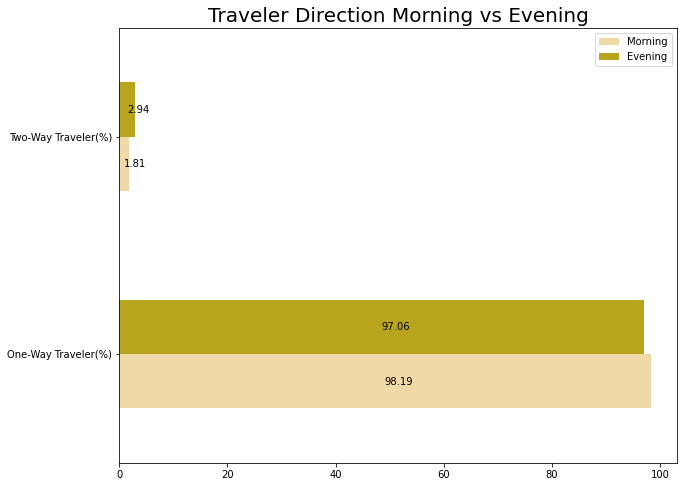

In [35]:
ax = df.plot.barh(stacked=False, figsize= (10,8), color=['#EFD9A6', '#B9A41D'])
ax.set_title("Traveler Direction Morning vs Evening", size=20)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center')

In [36]:
twoway_map_morning = twoway_morning.groupby('from_station_name').count().sort_values(by='to_station_name', ascending=False)
print('5 Stations with the Highest Number of Two-Way Traveller - Morning')
twoway_map_morning[:5]

5 Stations with the Highest Number of Two-Way Traveller - Morning


,to_station_name
from_station_name,
Bay St / Queens Quay W (Ferry Terminal),564
Humber Bay Shores Park West,350
York St / Queens Quay W,289
Tommy Thompson Park (Leslie Street Spit),272
Lakeshore Blvd W / Windermere Ave,225


In [37]:
twoway_map_evening = twoway_evening.groupby('from_station_name').count().sort_values(by='to_station_name', ascending=False)
print('5 Stations with the Highest Number of Two-Way Traveller - Evening')
twoway_map_evening[:5]

5 Stations with the Highest Number of Two-Way Traveller - Evening


,to_station_name
from_station_name,
Bay St / Queens Quay W (Ferry Terminal),1129
Humber Bay Shores Park West,794
Ontario Place Blvd / Lakeshore Blvd W,711
Lakeshore Blvd W / Ellis Ave,707
HTO Park (Queens Quay W),691


### **2. Find out what percentage of bikes are returned to its initial location?**

In [38]:
route = data
route = data[['from_station_name', 'to_station_name']]

In [39]:
twoway = route.copy()
twoway = twoway[twoway.from_station_name == twoway.to_station_name]
oneway = route.copy()
oneway = oneway[oneway.from_station_name != oneway.to_station_name]

In [40]:
twoway_percent = ((twoway['from_station_name'].count() / (twoway['from_station_name'].count() + oneway['from_station_name'].count()))*100).round(2)
twoway_percent

2.98

In [41]:
oneway_percent = ((oneway['from_station_name'].count() / (twoway['from_station_name'].count() + oneway['from_station_name'].count()))*100).round(2)
oneway_percent

97.02

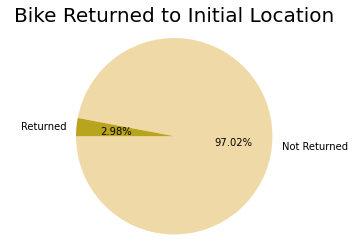

In [42]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Not Returned', 'Returned'
sizes = [oneway_percent, twoway_percent]
colors = ["#EFD9A6", "#B9A41D"]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Bike Returned to Initial Location", loc="center", size=20)
plt.show()

### **3. What time is the busy time in a day?**

In [94]:
import datetime as dt
from pandas.api.types import CategoricalDtype
# Create the day of week Category by iterrating over 7 days (Oktober 19th, 2020 is a Monday)
days = [(dt.datetime(2020, 10, 19) + dt.timedelta(days=x)).strftime('%a') for x in range(0, 7)]
day_type = CategoricalDtype(categories=days, ordered=True)

# Create the month Category by iterrating over the months
months = [dt.datetime(2020, x, 1).strftime('%B') for x in range(1, 13)]
month_type = CategoricalDtype(categories=months, ordered=True)


data['Date'] = data['time'].apply(lambda x: x.strftime('%Y-%m-%d'))
data['Quarter'] = data['time'].apply(lambda x: int((int(x.strftime('%m')) - 1) / 3) + 1)
data['Month'] = data['time'].apply(lambda x: x.strftime('%B')).astype(month_type)
data['Day of Week'] = data['time'].apply(lambda x: x.strftime('%a')).astype(day_type)
data['Hour'] = data['time'].apply(lambda time: time.hour)
data.head(10)

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type,time,period,duration_min,hour_start,month_start,weekday_start,route,Date,Quarter,Month,Day of Week,Hour
index,,,,,,,,,,,,,,,,,,,,,
2018-01-01,2383648,393,7018,2018-01-01 00:47:00,Bremner Blvd / Rees St,2018-01-01 00:54:00,7176,Bathurst St / Fort York Blvd,Annual Member,2018-01-01 00:47:00,Late Night,7.0,0,Jan,Mon,Bremner Blvd / Rees St to Bathurst St / Fort Y...,2018-01-01,1,January,Mon,0
2018-01-01,2383649,625,7184,2018-01-01 00:52:00,Ossington Ave / College St,2018-01-01 01:03:00,7191,Central Tech (Harbord St),Annual Member,2018-01-01 00:52:00,Late Night,10.0,0,Jan,Mon,Ossington Ave / College St to Central Tech (H...,2018-01-01,1,January,Mon,0
2018-01-01,2383650,233,7235,2018-01-01 00:55:00,Bay St / College St (West Side) - SMART,2018-01-01 00:59:00,7021,Bay St / Albert St,Annual Member,2018-01-01 00:55:00,Late Night,4.0,0,Jan,Mon,Bay St / College St (West Side) - SMART to Bay...,2018-01-01,1,January,Mon,0
2018-01-01,2383651,1138,7202,2018-01-01 00:57:00,Queen St W / York St (City Hall),2018-01-01 01:16:00,7020,Phoebe St / Spadina Ave,Annual Member,2018-01-01 00:57:00,Late Night,19.0,0,Jan,Mon,Queen St W / York St (City Hall) to Phoebe St ...,2018-01-01,1,January,Mon,0
2018-01-01,2383652,703,7004,2018-01-01 01:00:00,University Ave / Elm St,2018-01-01 01:12:00,7060,Princess St / Adelaide St E,Annual Member,2018-01-01 01:00:00,Late Night,12.0,1,Jan,Mon,University Ave / Elm St to Princess St / Adela...,2018-01-01,1,January,Mon,1
2018-01-01,2383653,1026,7078,2018-01-01 01:07:00,College St / Major St,2018-01-01 01:24:00,7130,Pears Av / Avenue Rd,Annual Member,2018-01-01 01:07:00,Late Night,17.0,1,Jan,Mon,College St / Major St to Pears Av / Avenue Rd,2018-01-01,1,January,Mon,1
2018-01-01,2383654,274,7021,2018-01-01 01:33:00,Bay St / Albert St,2018-01-01 01:38:00,7033,Union Station,Annual Member,2018-01-01 01:33:00,Late Night,5.0,1,Jan,Mon,Bay St / Albert St to Union Station,2018-01-01,1,January,Mon,1
2018-01-01,2383655,764,7046,2018-01-01 01:34:00,Niagara St / Richmond St W,2018-01-01 01:47:00,7275,Queen St W / James St,Annual Member,2018-01-01 01:34:00,Late Night,13.0,1,Jan,Mon,Niagara St / Richmond St W to Queen St W / Jam...,2018-01-01,1,January,Mon,1
2018-01-01,2383657,237,7044,2018-01-01 01:37:00,Church St / Alexander St,2018-01-01 01:41:00,7028,Gould St / Mutual St,Annual Member,2018-01-01 01:37:00,Late Night,4.0,1,Jan,Mon,Church St / Alexander St to Gould St / Mutual St,2018-01-01,1,January,Mon,1


In [95]:
# Aggregate the ridership by date fields and user type and count the number of unique trips
ridership = data
ridership = ridership[['trip_id','period','Date', 'Quarter', 'Month', 'Day of Week', 'user_type','Hour']]
ridership

,trip_id,period,Date,Quarter,Month,Day of Week,user_type,Hour
index,,,,,,,,
2018-01-01,2383648,Late Night,2018-01-01,1,January,Mon,Annual Member,0
2018-01-01,2383649,Late Night,2018-01-01,1,January,Mon,Annual Member,0
2018-01-01,2383650,Late Night,2018-01-01,1,January,Mon,Annual Member,0
2018-01-01,2383651,Late Night,2018-01-01,1,January,Mon,Annual Member,0
2018-01-01,2383652,Late Night,2018-01-01,1,January,Mon,Annual Member,1
...,...,...,...,...,...,...,...,...
2018-12-31,4581273,Night,2018-12-31,4,December,Mon,Annual Member,23
2018-12-31,4581274,Night,2018-12-31,4,December,Mon,Annual Member,23
2018-12-31,4581275,Night,2018-12-31,4,December,Mon,Annual Member,23


No handles with labels found to put in legend.


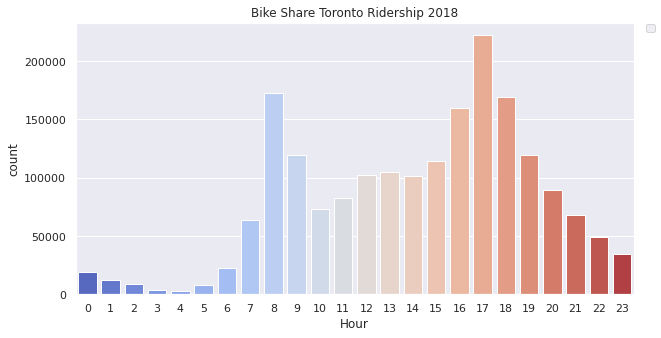

In [96]:
#Jumlah Bike share selama 1 tahun
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
ridership = sns.countplot(data=ridership, x='Hour', palette='coolwarm')
plt.title('Bike Share Toronto Ridership 2018')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.1)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


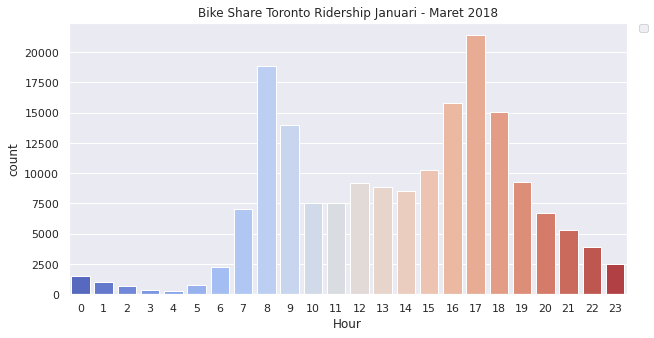

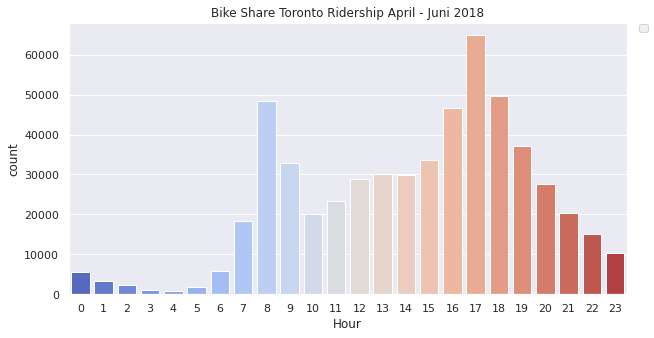

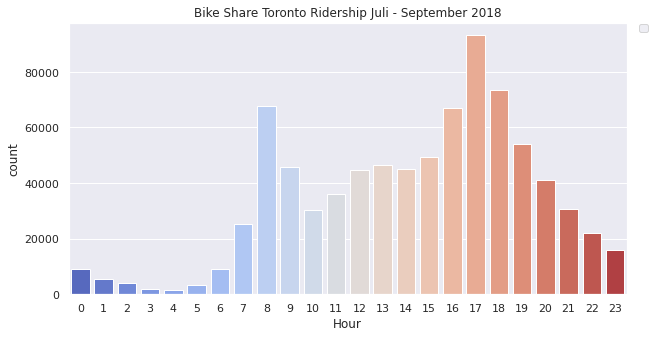

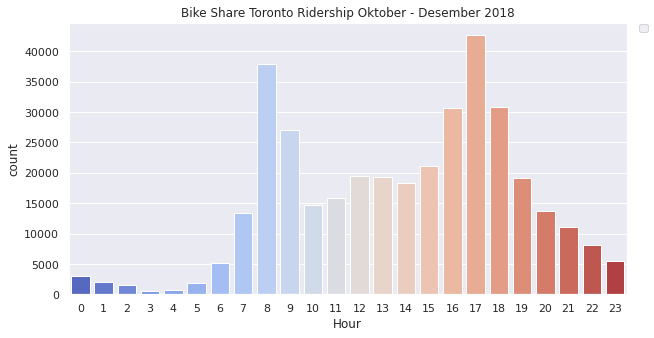

In [98]:
#Mengelompokkan berdasarkan Quartil
Quarter_1 = data[(data['Quarter'] == 1)]
Quarter_2 = data[(data['Quarter'] == 2)]
Quarter_3 = data[(data['Quarter'] == 3)]
Quarter_4 = data[(data['Quarter'] == 4)]

#Quartil 1
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
ridership = sns.countplot(data=Quarter_1, x='Hour', palette='coolwarm')
plt.title('Bike Share Toronto Ridership Januari - Maret 2018')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.1)
#Quartil 2
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
ridership = sns.countplot(data=Quarter_2, x='Hour', palette='coolwarm')
plt.title('Bike Share Toronto Ridership April - Juni 2018')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.1)
#Quartil 3
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
ridership = sns.countplot(data=Quarter_3, x='Hour', palette='coolwarm')
plt.title('Bike Share Toronto Ridership Juli - September 2018')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.1)
#Quartil 4
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
ridership = sns.countplot(data=Quarter_4, x='Hour', palette='coolwarm')
plt.title('Bike Share Toronto Ridership Oktober - Desember 2018')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.1)

### **4. Which station is the most crowded?**

Text(0.5, 1.0, 'Top 5 Most Crowded Departing Station')

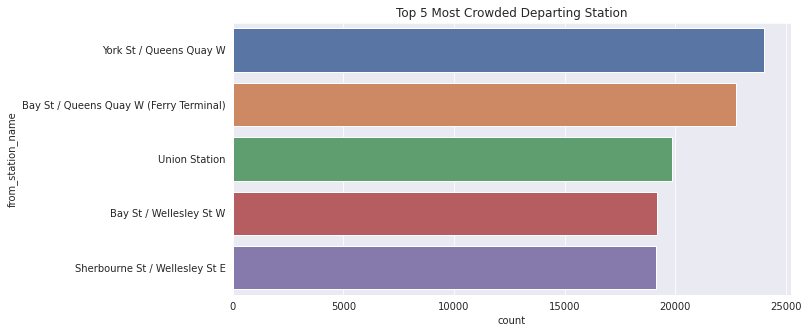

In [47]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.countplot(y=data['from_station_name'],data=data, palette='deep',order=data['from_station_name'].value_counts().index[:5])
plt.title('Top 5 Most Crowded Departing Station')

Text(0.5, 1.0, 'Top 5 Most Crowded Arriving Station')

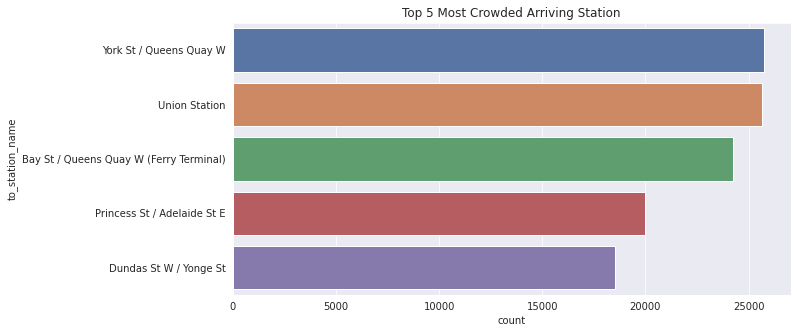

In [48]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.countplot(y=data['to_station_name'],data=data, palette='deep',order=data['to_station_name'].value_counts().index[:5])
plt.title('Top 5 Most Crowded Arriving Station')

### **5. What are the behaviour differences between annual and casual members?**

In [51]:
data['duration_min']=round(data['trip_duration_seconds']/60)
data.head()

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type,time,period,duration_min
index,,,,,,,,,,,,
2018-01-01,2383648,393,7018,1/1/2018 0:47,Bremner Blvd / Rees St,1/1/2018 0:54,7176,Bathurst St / Fort York Blvd,Annual Member,2018-01-01 00:47:00,Late Night,7.0
2018-01-01,2383649,625,7184,1/1/2018 0:52,Ossington Ave / College St,1/1/2018 1:03,7191,Central Tech (Harbord St),Annual Member,2018-01-01 00:52:00,Late Night,10.0
2018-01-01,2383650,233,7235,1/1/2018 0:55,Bay St / College St (West Side) - SMART,1/1/2018 0:59,7021,Bay St / Albert St,Annual Member,2018-01-01 00:55:00,Late Night,4.0
2018-01-01,2383651,1138,7202,1/1/2018 0:57,Queen St W / York St (City Hall),1/1/2018 1:16,7020,Phoebe St / Spadina Ave,Annual Member,2018-01-01 00:57:00,Late Night,19.0
2018-01-01,2383652,703,7004,1/1/2018 1:00,University Ave / Elm St,1/1/2018 1:12,7060,Princess St / Adelaide St E,Annual Member,2018-01-01 01:00:00,Late Night,12.0


In [52]:
grouped = data.groupby('user_type')['trip_duration_seconds'].count()
total_count = grouped[0]+grouped[1]
percent_a = round(grouped[0]/total_count*100)
percent_c = round(grouped[1]/total_count*100)

In [53]:
print('In 2018, Annual Member made up to', percent_a, '%', 'with total members of', grouped[0])

In 2018, Annual Member made up to 82.0 % with total members of 1572980


Text(0.5, 1.0, 'Bike Share Toronto Membership 2018')

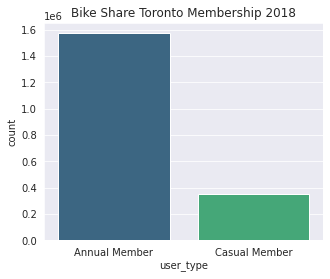

In [57]:
plt.figure(figsize=(5,4))
sns.set_style('darkgrid')
sns.countplot(x='user_type',data=data,palette='viridis')
plt.title('Bike Share Toronto Membership 2018')

In [58]:
data['trip_start_time'] = pd.to_datetime(data['trip_start_time'])
data['trip_stop_time'] = pd.to_datetime(data['trip_stop_time'])

In [59]:
data.head()

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type,time,period,duration_min
index,,,,,,,,,,,,
2018-01-01,2383648,393,7018,2018-01-01 00:47:00,Bremner Blvd / Rees St,2018-01-01 00:54:00,7176,Bathurst St / Fort York Blvd,Annual Member,2018-01-01 00:47:00,Late Night,7.0
2018-01-01,2383649,625,7184,2018-01-01 00:52:00,Ossington Ave / College St,2018-01-01 01:03:00,7191,Central Tech (Harbord St),Annual Member,2018-01-01 00:52:00,Late Night,10.0
2018-01-01,2383650,233,7235,2018-01-01 00:55:00,Bay St / College St (West Side) - SMART,2018-01-01 00:59:00,7021,Bay St / Albert St,Annual Member,2018-01-01 00:55:00,Late Night,4.0
2018-01-01,2383651,1138,7202,2018-01-01 00:57:00,Queen St W / York St (City Hall),2018-01-01 01:16:00,7020,Phoebe St / Spadina Ave,Annual Member,2018-01-01 00:57:00,Late Night,19.0
2018-01-01,2383652,703,7004,2018-01-01 01:00:00,University Ave / Elm St,2018-01-01 01:12:00,7060,Princess St / Adelaide St E,Annual Member,2018-01-01 01:00:00,Late Night,12.0


In [60]:
# Membuat kolom baru untuk mendapatkan jam, hari, dan bulan pemakaian
data['hour_start'] = data['trip_start_time'].apply(lambda time: time.hour)
data['month_start'] = data['trip_start_time'].apply(lambda time: time.month)
data['weekday_start'] = data['trip_start_time'].apply(lambda time: time.dayofweek)

In [61]:
mon = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
data['month_start'] = data['month_start'].map(mon)

day = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['weekday_start'] = data['weekday_start'].map(day)

In [62]:
data.head()

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type,time,period,duration_min,hour_start,month_start,weekday_start
index,,,,,,,,,,,,,,,
2018-01-01,2383648,393,7018,2018-01-01 00:47:00,Bremner Blvd / Rees St,2018-01-01 00:54:00,7176,Bathurst St / Fort York Blvd,Annual Member,2018-01-01 00:47:00,Late Night,7.0,0,Jan,Mon
2018-01-01,2383649,625,7184,2018-01-01 00:52:00,Ossington Ave / College St,2018-01-01 01:03:00,7191,Central Tech (Harbord St),Annual Member,2018-01-01 00:52:00,Late Night,10.0,0,Jan,Mon
2018-01-01,2383650,233,7235,2018-01-01 00:55:00,Bay St / College St (West Side) - SMART,2018-01-01 00:59:00,7021,Bay St / Albert St,Annual Member,2018-01-01 00:55:00,Late Night,4.0,0,Jan,Mon
2018-01-01,2383651,1138,7202,2018-01-01 00:57:00,Queen St W / York St (City Hall),2018-01-01 01:16:00,7020,Phoebe St / Spadina Ave,Annual Member,2018-01-01 00:57:00,Late Night,19.0,0,Jan,Mon
2018-01-01,2383652,703,7004,2018-01-01 01:00:00,University Ave / Elm St,2018-01-01 01:12:00,7060,Princess St / Adelaide St E,Annual Member,2018-01-01 01:00:00,Late Night,12.0,1,Jan,Mon


In [63]:
data['route']=data['from_station_name'].map(str) + ' to ' + data['to_station_name'].map(str)

Text(0.5, 1.0, 'Top 5 Routes (Annual Members)')

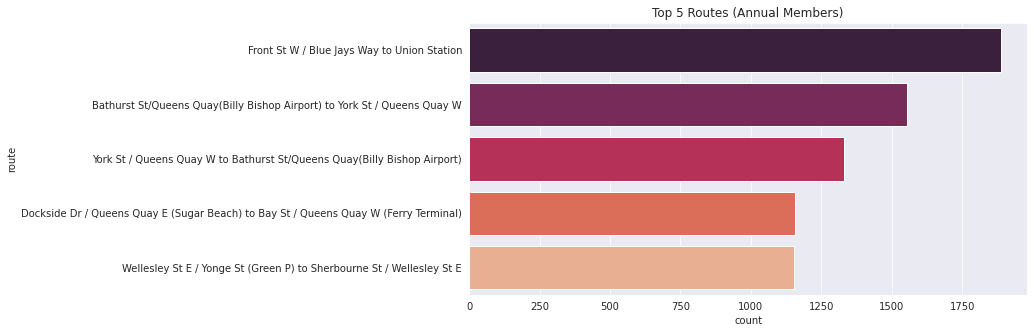

In [69]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.countplot(y=data[data['user_type']=='Annual Member']['route'],data=data, palette='rocket',order=data[data['user_type']=='Annual Member']['route'].value_counts().index[:5])
plt.title('Top 5 Routes (Annual Members)')

Text(0.5, 1.0, 'Top 5 Routes (Casual Members)')

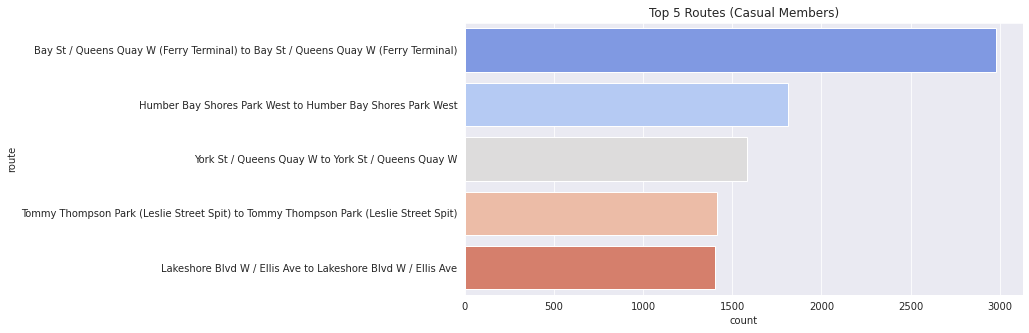

In [70]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.countplot(y=data[data['user_type']=='Casual Member']['route'],data=data, palette='coolwarm',order=data[data['user_type']=='Casual Member']['route'].value_counts().index[:5])
plt.title('Top 5 Routes (Casual Members)')

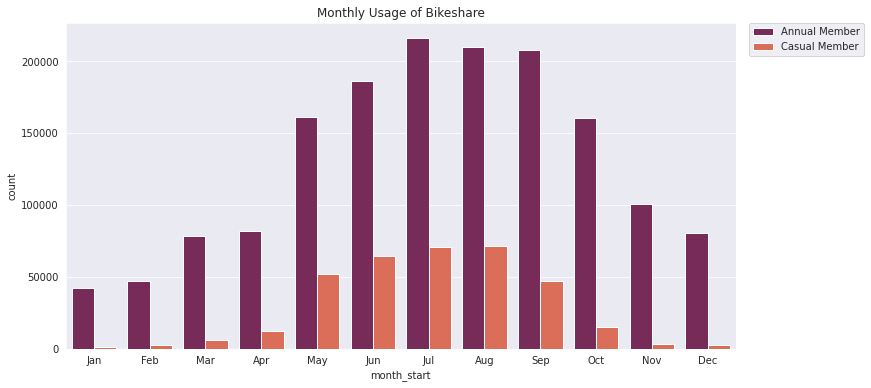

In [71]:
# Mencari data pemakaian bikeshare tiap bulan
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
ridership = sns.countplot(data=data, x='month_start', hue='user_type', palette='rocket')
plt.title('Monthly Usage of Bikeshare')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

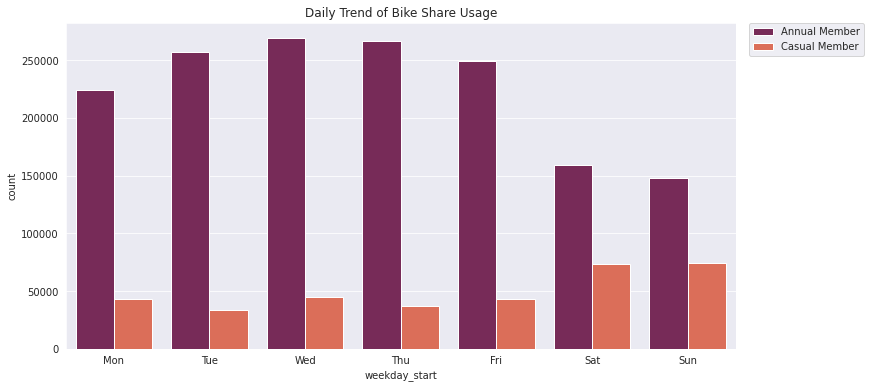

In [73]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
ridership = sns.countplot(data=data, x='weekday_start', hue='user_type', palette='rocket')
plt.title('Daily Trend of Bike Share Usage')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

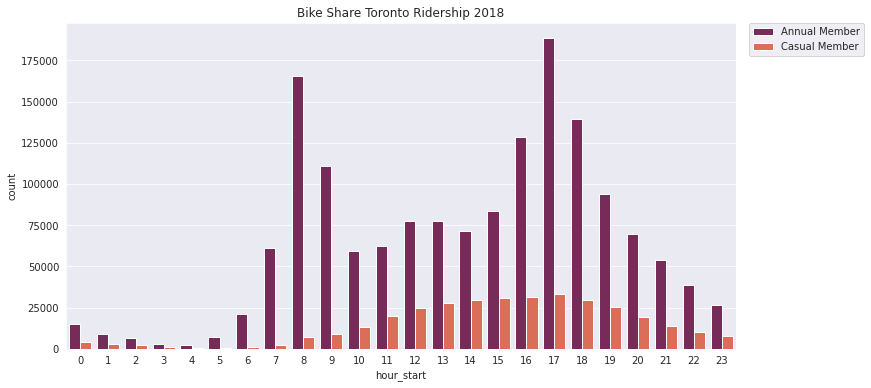

In [75]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
ridership = sns.countplot(data=data, x='hour_start', hue='user_type', palette='rocket')
plt.title('Bike Share Toronto Ridership 2018')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [76]:
# Membuat heatmap
daily_activity = data.groupby(by=['weekday_start','hour_start']).count()['user_type'].unstack()
daily_activity.head()

hour_start,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
weekday_start,,,,,,,,,,,,,,,,,,,,,,,,
Fri,2758,1435,921,415,526,1260,3920,11609,32232,20841,10622,11655,14573,14568,14195,17432,25558,32928,23487,16498,11998,9395,7385,6088
Mon,2163,1213,853,419,462,1295,3556,10103,27657,17099,9069,10435,13439,13504,12825,13925,21527,34102,25205,16828,12268,9289,6265,3783
Sat,4092,3031,2328,1028,484,481,1046,2387,5029,8721,11345,14722,17401,18793,19338,19476,19770,18857,17070,14714,11221,8531,6771,5739
Sun,4006,3295,2632,1255,590,506,956,2003,3762,7050,10731,13789,16296,18352,19329,20077,19791,18548,16553,13864,10903,7996,5712,4209
Thu,2325,1172,786,286,394,1421,4299,13083,35853,23436,10892,11146,14052,13628,12264,14885,24155,37018,27652,18586,13675,10153,7495,5217


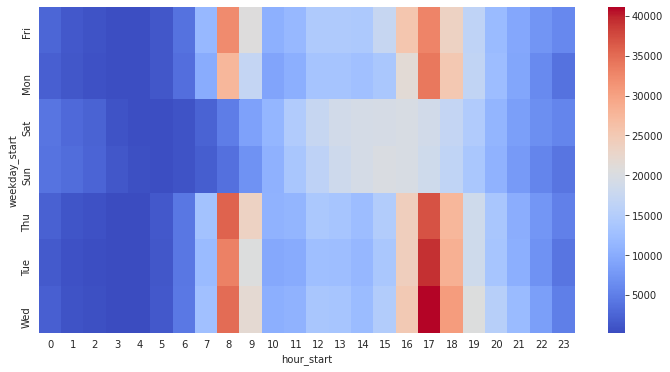

In [79]:
plt.figure(figsize=(12,6))
heatmap = sns.heatmap(daily_activity,cmap='coolwarm')
heatmap.figure.savefig('heatmap.png')

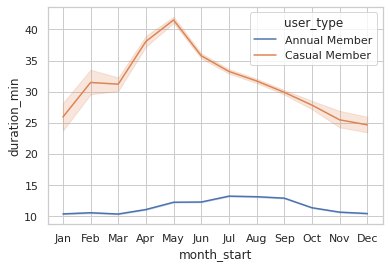

In [81]:
sns.set_theme(style="whitegrid")
sns.lineplot(x="month_start", y="duration_min",
             hue="user_type",
             data=data)